<a href="https://colab.research.google.com/github/Anchit-2002/Phising-Website-Detection-/blob/main/Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load data using Dask
df = pd.read_csv('/content/phisurl_dataset.csv')
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


Null Values

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Shape of dataset
df.shape

(235795, 56)

In [ ]:
# Calculate null and duplicated values
print("Null values:" ,df.isnull().sum().sum())
print("Duplicated Values:",df.duplicated().sum().sum())


Null values: 0
Duplicated Values: 0


In [ ]:
# Describe dataset
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


**Pre Processing**

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
corr_matrix = df[numeric_columns].corr()
columns = corr_matrix.columns
columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

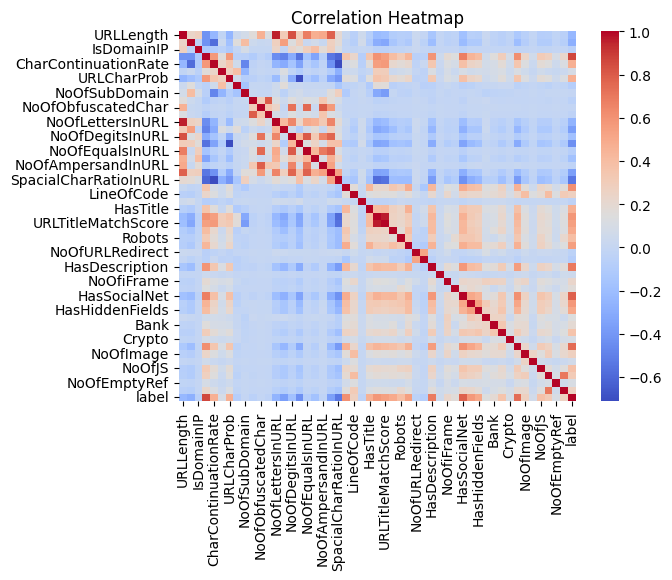

In [ ]:
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.90:
            columns_to_drop.append(columns[j])

print(columns_to_drop)

['NoOfLettersInURL', 'URLTitleMatchScore']


In [ ]:
categorical_columns

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'], dtype='object')

In [ ]:
# chi square test
from scipy.stats import chi2_contingency
score = []
for feature in categorical_columns:
    # create contingency table
    ct = pd.crosstab(df['label'], df[feature])

    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

score

[0.4990317742645362, 0.26713702081407115, 3.9723625095178014e-117, 0.0, 0.0]

<Axes: >

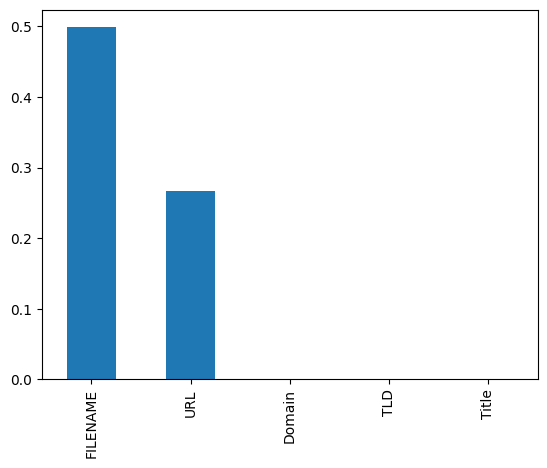

In [ ]:
pd.Series(score, index= categorical_columns).plot(kind='bar')

In [ ]:
columns_to_drop = ['FILENAME','URLTitleMatchScore','URL']
df.drop(columns=columns_to_drop, inplace=True, axis=1, errors='ignore')
df


,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,...,0,0,1,34,20,28,119,0,124,1
1,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,...,0,0,1,50,9,8,39,0,217,1
2,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,...,0,0,1,10,2,7,42,2,5,1
3,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,...,1,1,1,3,27,15,22,1,31,1
4,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,...,1,0,1,51,7,21,187,2,191,1
235791,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,...,1,0,0,50,1,7,88,0,31,1
235792,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,...,0,0,1,27,10,30,58,2,67,1
235793,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,...,0,0,0,0,0,3,0,0,0,0


**Exploring Categorical Columns**

In [ ]:
# Title column
df['Title']

,Title
0,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,johannes gutenberg-universitÃ¤t mainz
2,voice fm southampton
3,home page: seminars in fetal and neonatal medi...
4,fundaciÃ³n rewilding argentina
...,...
235790,skincareliving
235791,winchestergov
235792,nononsensedesign
235793,patient-cell-40f5updatedlogmyloginworkers


In [ ]:
# Artifcats
import re
df['EncodingArtifacts'] = df['Title'].apply(lambda x: 1 if re.search(r'[^\x00-\x7F]', x) else 0)
df['EncodingArtifacts'].value_counts()


,count
EncodingArtifacts,
0,235787
1,8


In [ ]:
# Title
df['IsEmptyOrGenericTitle'] = df['Title'].apply(lambda x: 1 if x.strip().lower() in ['home page', 'welcome', ''] else 0)
df['IsEmptyOrGenericTitle'].value_counts()


,count
IsEmptyOrGenericTitle,
0,235794
1,1


**The columns EncodingArtifacts and EmptyGenericTitle are imbalanced**

In [ ]:
# creating a Numeric DataFrame
Numeric = df.select_dtypes(include=['int64', 'float64'])
Numeric.drop(columns='label', inplace=True)
Numeric

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,EncodingArtifacts,IsEmptyOrGenericTitle
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,0,1,34,20,28,119,0,124,1,0
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,1,50,9,8,39,0,217,1,0
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,1,10,2,7,42,2,5,0,0
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,1,1,3,27,15,22,1,31,0,0
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,0,1,244,15,34,72,1,85,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,0,1,51,7,21,187,2,191,0,0
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,0,0,50,1,7,88,0,31,0,0
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,0,1,27,10,30,58,2,67,0,0
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0,0,0,0,3,0,0,0,0,0


In [ ]:
Numeric.shape

(235795, 51)

In [ ]:
Numeric.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'EncodingArtifacts',
       'IsEmptyOrGenericTitle'],
      dtype='

In [ ]:
X = Numeric
y = df['label']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((188636, 51), (47159, 51))

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_test_pca.shape

(47159, 32)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train_pca, y_train)

# Make predictions
train_predictions = tree.predict(X_train_pca)
test_predictions = tree.predict(X_test_pca)

# Print predictions for the training and testing sets
print("Training Set Predictions:", train_predictions)
print("Testing Set Predictions:", test_predictions)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Set Predictions: [0 0 1 ... 0 1 1]
Testing Set Predictions: [1 1 0 ... 1 0 0]
Training Accuracy: 98.97%
Testing Accuracy: 98.89%


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Predictions
train_predictions = rf.predict(X_train_pca)
test_predictions = rf.predict(X_test_pca)

# Accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 99.83%


In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_pca, y_train)

# Predictions
train_predictions = logreg.predict(X_train_pca)
test_predictions = logreg.predict(X_test_pca)

# Accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Output results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.97%
Testing Accuracy: 99.97%


In [ ]:
!pip install xgboost

In [ ]:
# Xg Boost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    n_estimators=100,       # Number of trees
    learning_rate=0.1,      # Learning rate
    max_depth=3,            # Maximum depth of trees
    random_state=42,        # Ensures reproducibility
    use_label_encoder=False # Avoids label encoding warning (for older versions of XGBoost)
)
xgb_model.fit(X_train_pca, y_train)

# Predictions
train_predictions = xgb_model.predict(X_train_pca)
test_predictions = xgb_model.predict(X_test_pca)

# Accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Output results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:54:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 99.84%
Testing Accuracy: 99.80%


In [ ]:
import pickle

with open("Tree", "wb") as file:
    pickle.dump(tree, file)

In [ ]:
import pickle

with open("pca", "wb") as file:
    pickle.dump(pca, file)